#  ANAMOLY DETECTION IN TELECOM NETWORKS WITH MACHINE LEARNING
**A Case study by Harish Julapalli**

## Business context
<p>With the development of large open networks, security threats for the networks have increased significantly in the past few years. Different types of attacks possess different types of threats to network and network resources. Many different detection mechanisms have been proposed by various researchers.
</p>
<p>
This is an attempt to predict such attacks in the network using various Machine Learning techniques available.
</p>

## Business problem
The task is to build network intrusion detection system to detect anomalies and attacks in the
Network. There are two problems:

1. Binomial Classification: Predict wether an activity is normal or an anomoly.
2. Multinomial classification: Predict the type of attack -  normal or DOS or PROBE or R2L or U2R.

## Overview

A quick overview of what is being done in this notebook:

There are two business problems defined: one for predicting wether an Attack occured and the other for predicting the type of attack. So, we will be doing these analysis in 2 parts and below steps will be done for both of the parts:
- Data and Data set description
- Exploratory Data analysis
- Feature selection and scaling
- Model Building and evaluation
- Scope for future work
- References

### Data set description

Let us examine the basic features of the dataset

In [1]:
#importing required libraries for data manipulation and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
#load training and test sets
#column names
names = ["duration","protocol_type","service","flag","src_bytes","dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins","logged_in","num_compromised","root_shell","su_attempted","num_root","num_file_creations","num_shells","num_access_files","num_outbound_cmds","is_host_login","is_guest_login","count","srv_count","serror_rate", "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate", "diff_srv_rate", "srv_diff_host_rate","dst_host_count","dst_host_srv_count","dst_host_same_srv_rate",
"dst_host_diff_srv_rate","dst_host_same_src_port_rate","dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
"dst_host_rerror_rate","dst_host_srv_rerror_rate","attack", "last_flag"]

#Loading the test and training data
df = pd.read_csv("Train.txt", names = names)
df_test = pd.read_csv("Test.txt", names = names)

In [3]:
#see top 5 rows of the data set
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


#### Let us now see what does each column mean

_BASIC FEATURES OF EACH NETWORK CONNECTION VECTOR_
1. **Duration:** Length of time duration of the connection.
2. **Protocol_type:** Protocol used in the connection.
3. **Service:** Destination network service used.
4. **Flag:** Status of the connection – Normal or Error.
5. **Src_bytes:** Number of data bytes transferred from source to destination in single connection.
6. **Dst_bytes:** Number of data bytes transferred from destination to source in single connection.
7. **Land:** if source and destination IP addresses and port numbers are equal then, this variable takes value 1,else 0.
8. **Wrong_fragment:** Total number of wrong fragments in this connection.
9. **Urgent:** Number of urgent packets in this connection. **Urgent packets are packets with the urgent bit Activated.

_CONTENT RELATED FEATURES OF EACH NETWORK CONNECTION VECTOR_
10. **Hot:** Number of 'hot' indicators in the content such as: entering a system directory, creating programs and executing programs.
11. **Num_failed _logins:** Count of failed login attempts.
12. **Logged_in Login Status:** 1 if successfully logged in; 0 otherwise.
13. **Num_compromised:** Number of 'compromised' conditions.
14. **Root_shell:** 1 if root shell is obtained; 0 otherwise.
15. **Su_attempted:** 1 if 'su root' command attempted or used; 0 otherwise.
16. **Num_root:** Number of 'root' accesses or number of operations performed as a root in the connection.
17. **Num_file_creations:** Number of file creation operations in the connection.
18. **Num_shells:** Number of shell prompts.
19. **Num_access_files:** Number of operations on access control files.
20. **Num_outbound_cmds:** Number of outbound commands in an ftp session.
21. **Is_hot_login:** 1 if the login belongs to the 'hot' list i.e., root or admin; else 0.
22. **Is_guest_login:** 1 if the login is a 'guest' login; 0 otherwise.

_TIME RELATED TRAFFIC FEATURES OF EACH NETWORK CONNECTION VECTOR_
23. **Count:** Number of connections to the same destination host as the current connection in the past two seconds.
24. **Srv_count:** Number of connections to the same service (port number) as the current connection in the past two seconds.
25. **Serror_rate:** The percentage of connections that have activated the flag (4) s0, s1, s2 or s3, among the connections aggregated in count (23).
26. **Srv_serror_rate:** The percentage of connections that have activated the flag (4) s0, s1, s2 or s3, among the connections aggregated in srv_count (24).
27. **Rerror_rate:** The percentage of connections that have activated the flag (4) REJ, among the connections aggregated in count (23).
28. **Srv_rerror_rate:** The percentage of connections that have activated the flag (4) REJ, among the connections aggregated in srv_count (24).
29. **Same_srv_rate:** The percentage of connections that were to the same service, among the connections aggregated in count (23).
30. **Diff_srv_rate:** The percentage of connections that were to different services, among the connections aggregated in count (23).
31. **Srv_diff_host_ rate:** The percentage of connections that were to different destination machines among the connections aggregated in srv_count (24).

_HOST BASED TRAFFIC FEATURES IN A NETWORK CONNECTION VECTOR_
32. **Dst_host_count:** Number of connections having the same destination host IP address.
33. **Dst_host_srv_ count:** Number of connections having the same port number.
34. **Dst_host_same _srv_rate:** The percentage of connections that were to the same service, among the connections aggregated in dst_host_count (32).
35. **Dst_host_diff_ srv_rate:** The percentage of connections that were to different services, among the connections aggregated in dst_host_count (32).
36. **Dst_host_same _src_port_rate:** The percentage of connections that were to the same source port, among the connections aggregated in dst_host_srv_c ount (33).
37. **Dst_host_srv_ diff_host_rate:** The percentage of connections that were to different destination machines, among the connections aggregated in dst_host_srv_count (33).
38. **Dst_host_serro r_rate:** The percentage of connections that have activated the flag (4) s0, s1, s2 or s3, among the connections aggregated in dst_host_count (32).
39. **Dst_host_srv_s error_rate:** The percent of connections that have activated the flag (4) s0, s1, s2 or s3, among the connections aggregated in dst_host_srv_c ount (33).
40. **Dst_host_rerro r_rate:** The percentage of connections that have activated the flag (4) REJ, among the connections aggregated in dst_host_count (32).
41. **Dst_host_srv_r error_rate:** The percentage of connections that have activated the flag (4) REJ, among the connections aggregated in dst_host_srv_c ount (33).

In [4]:
#Examining the dimensions of training and test sets
print(f"shape of the training data is: {df.shape}")
print(f"shape of the test data is: {df_test.shape}")

shape of the training data is: (125973, 43)
shape of the test data is: (22544, 43)


So there are 125973 rows in training set and 22544 rows in test set. The training set is pretty huge, so we have enough examples for training our model.

In [5]:
#Info on the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 43 columns):
duration                       125973 non-null int64
protocol_type                  125973 non-null object
service                        125973 non-null object
flag                           125973 non-null object
src_bytes                      125973 non-null int64
dst_bytes                      125973 non-null int64
land                           125973 non-null int64
wrong_fragment                 125973 non-null int64
urgent                         125973 non-null int64
hot                            125973 non-null int64
num_failed_logins              125973 non-null int64
logged_in                      125973 non-null int64
num_compromised                125973 non-null int64
root_shell                     125973 non-null int64
su_attempted                   125973 non-null int64
num_root                       125973 non-null int64
num_file_creations             125973 

Most of our features are numerical. There are only 3 Categorical variables - 'protocol_type', 'service' and 'flag'. Our target features is: 'attack'

Now let us examine for missing values in the dataset.

In [6]:
#Examining the number of missing values
df.isna().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

There are no missing values in the dataset.

## Part1 - Predicting an attack

#### Exploratory Data Analysis

Now let us explore our data:

<p>Distribution of various kinds of attacks can be explored with bar graphs. To mark Attacks and Normal traffic let us create another feature for labelling our data. Normal traffic will be mapped with '0' and an Attack would be mapped with '1'.</p>

In [7]:
#Marking the anomoly
def label_attack(x):
    if x['attack'] == 'normal':
        return 0
    return 1

df['target'] = df[['attack']].apply(label_attack, axis = 1)
df_test['target'] = df_test[['attack']].apply(label_attack, axis = 1)

In [8]:
#percentage of attacks
attacks = df[df['target'] == 1]['target'].count()
percent_attacks = attacks/len(df)
print(f"The percent of anomolies in the training set are: {percent_attacks*100}")

The percent of anomolies in the training set are: 46.54171925730117


So, we have around 47% of our data classified as an Attack. This brings us to a conclusion that the data set provided is nearly a well balanced one.

Now let us visualize the same.

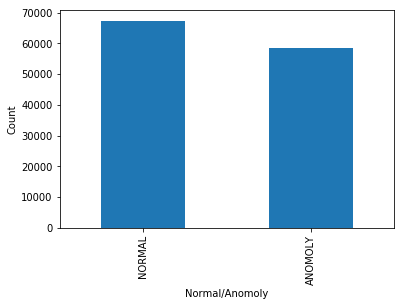

In [9]:
_ = df['target'].value_counts().plot.bar()
_ = plt.xticks([0,1],['NORMAL','ANOMOLY'])
_ = plt.ylabel('Count')
_ = plt.xlabel('Normal/Anomoly')
plt.show()

Same visualization with percentages on y-axis is shown below. This gives us a good intution of the distribution of suxpicious traffic at hand.

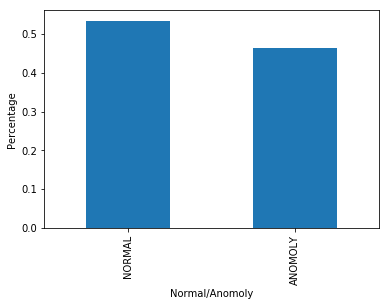

In [10]:
_ = (df['target'].value_counts()/len(df)).plot.bar()
_ = plt.xticks([0,1],['NORMAL','ANOMOLY'])
_ = plt.ylabel('Percentage')
_ = plt.xlabel('Normal/Anomoly')
plt.show()

In the description of the data, it is given that, 'Flag' is used to determine the status of the connection. So, let us examine how various flags are distributed.

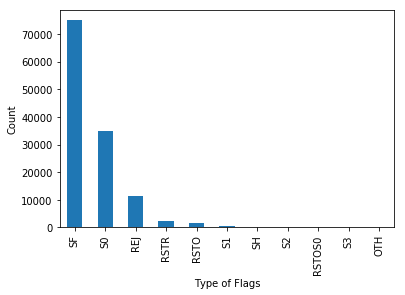

In [11]:
_ = df['flag'].value_counts().plot.bar()
_ = plt.ylabel('Count')
_ = plt.xlabel('Type of Flags')
plt.show()

It can be seen that, flags 'SF' and 'S0' are present more in number than rest of the flags. Now let us also see, how unusual traffic is distributed among these flags. The question here is to identify, which flags can be mostly used to identify intrusions in the network.

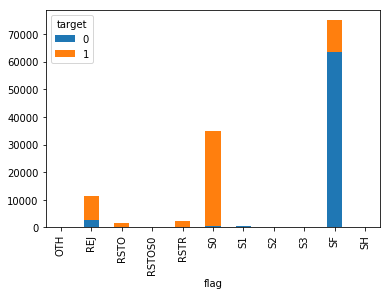

In [12]:
pd.crosstab(df['flag'],df['target']).plot.bar(stacked = True)
plt.show()

From the above bar graph, it is quite evident that, presence of the flag 'S0' can be related to presence of an anomoly in the network. While Flag 'SF' has more normal traffic, also has some intrusions.
Flags, 'RSTO' and 'RSTR' can be identified with unusual traffic. 

Now let us examine how attcks are distributed over various Destination services.

In [13]:
#Attacks over various destination services
s = pd.crosstab(df['service'],df['target'])

#sorting and viewing  the cross table
s.sort_values(1, ascending = False)

target,0,1
service,,
private,982,20871
eco_i,497,4089
ecr_i,190,2887
http,38049,2289
ftp_data,4984,1876
other,2604,1755
telnet,917,1436
finger,545,1222
Z39_50,0,862


Some services have more number of attacks than the rest. Also, some services are only labelled as attacks.This feature may be very crucial for us in our predictions.

Let us visualize the same over 20 Destination services:

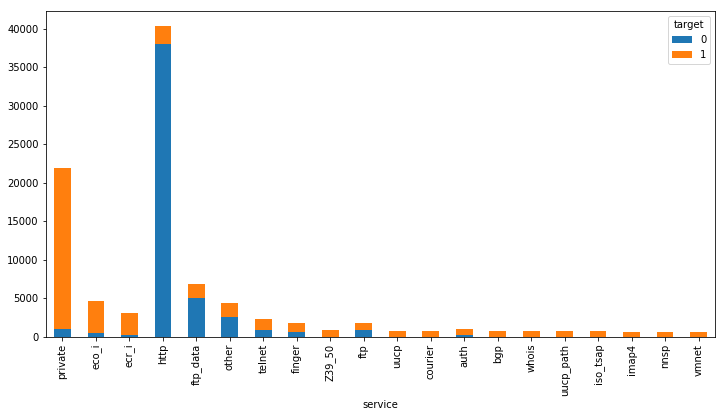

In [14]:
#bar graph over various serices
s.sort_values(1, ascending = False).head(20).plot.bar(stacked = True)
fig = plt.gcf()
fig.set_size_inches(12,6)
plt.show()

It is evident from the graph that 'private' service is prone to attacks than a 'http' service where most of the normal traffic is. Also, it can be seen that, some attacks like 'auth', 'courier' has only unusual traffic on them.

Let us now examine the content related features of the data set.

In [15]:
#making a list of content related fetures
content = ['num_failed_logins','num_compromised','num_root','num_file_creations','num_shells','num_outbound_cmds', 'num_access_files','target']

#subsetting the dataset on content related features.
df_content = df[content]

We will now plot a heatmap to see the correlations between various content related features of the dataset.

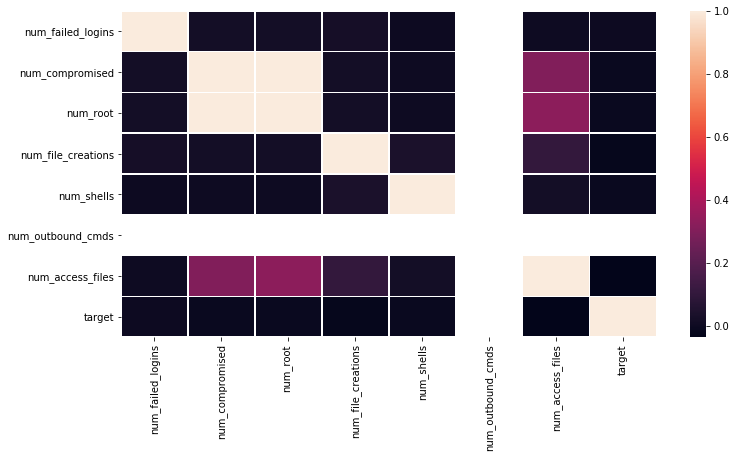

In [16]:
#heatmap of content related features
sns.heatmap(df_content.corr(), linewidths=.5)
fig = plt.gcf()
fig.set_size_inches(12,6)
plt.show()

From above plot it is evident that the feature, 'num_outbound_cmds' is highly correlated with all other content related features.

The features, 'num_compromised' and 'num_root' are also higly correlated

Similarly, with a heat map let us examine correlations between various time related data features.

In [17]:
#making a list of time related fetures
time = ['count', 'srv_count', 'serror_rate','srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate','diff_srv_rate', 'srv_diff_host_rate',"target"]

#subsetting time related features
df_time = df[time]

Let us now examine the heatmap of the time related features:

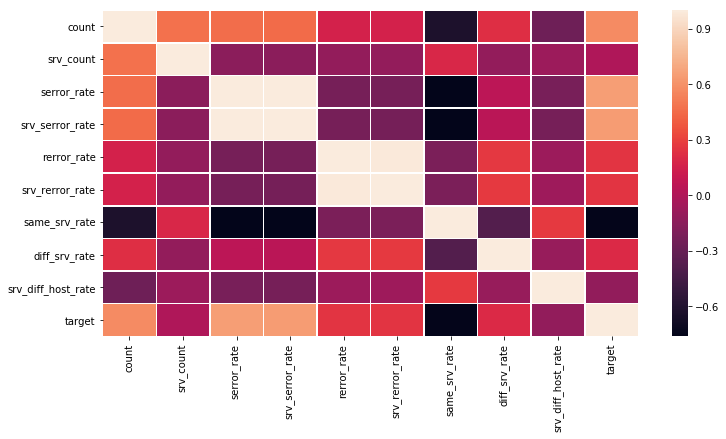

In [18]:
sns.heatmap(df_time.corr(), linewidths=.5)
fig = plt.gcf()
fig.set_size_inches(12,6)
plt.show()

From the heatmap above, 'srv_serror_rate' and 'serror_rate' are highly correlated. Also, 'rerror_rate' and 'srv_rerror_rate' are highly correlated.

Now, let us examine host related features in the dataset.

In [19]:
#host related features
host = ["dst_host_count","dst_host_srv_count","dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate","dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate","dst_host_rerror_rate","dst_host_srv_rerror_rate","target"]

#subsetting host related features
df_host = df[host]

Let us now examine the heatmap of the host related features:

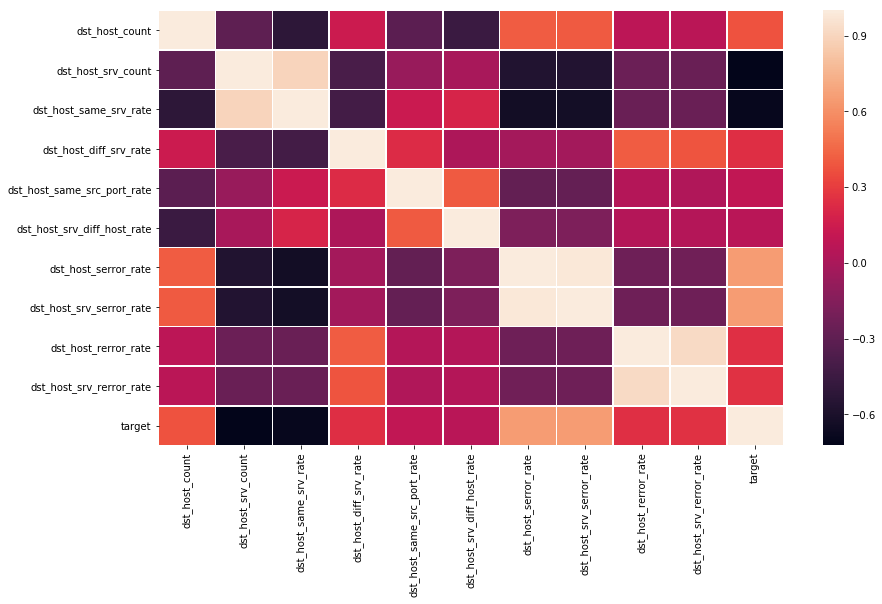

In [20]:
sns.heatmap(df_host.corr(), linewidths=.5)
fig = plt.gcf()
fig.set_size_inches(14,8)
plt.show()

Our target feature is highly correlated with features like, 'dst_host_serror_rate' and 'dst_host_srv_serror_rate'.

#### Feature encoding

There are some categorical features in the data set. But our models take only numerical values. So, to convert categorical variables to numeric features, we must be doing some preprocessing techniques.

In [21]:
#Determining Categorical variables in the data set
for col in df.columns:
    if df[col].dtypes == 'object':
        print(f"The feature:{col} has {len(df[col].unique())} categories.")

The feature:protocol_type has 3 categories.
The feature:service has 70 categories.
The feature:flag has 11 categories.
The feature:attack has 23 categories.


In [23]:
#Determining Categorical variables in the test data set
for col in df_test.columns:
    if df_test[col].dtypes == 'object':
        print(f"The feature:{col} has {len(df_test[col].unique())} categories.")

The feature:protocol_type has 3 categories.
The feature:service has 64 categories.
The feature:flag has 11 categories.
The feature:attack has 38 categories.


Test data set has, 6 categories less in 'service' feature as compared to training data.

Also, test data has (38-23) = 15 types of attack categories in addition to training data.

We will use One-hot-encoding technique to encode categorical features of the dataset. So, let us make column names for the dummy variables in the dataset.

In [22]:
#making column names for dummy variables of train data
#protocol
unique_protocol = sorted(df.protocol_type.unique())
s1 = 'protocol_type_'
unique_protocol2=[s1 + x for x in unique_protocol]

#service
unique_service=sorted(df.service.unique())
s2 = 'service_'
unique_service2=[s2 + x for x in unique_service]

# flag
unique_flag=sorted(df.flag.unique())
s3 = 'flag_'
unique_flag2=[s3 + x for x in unique_flag]

# put together
dumcols=unique_protocol2 + unique_service2 + unique_flag2
print(dumcols)

#Apply the same for test set
unique_service_test=sorted(df_test.service.unique())
unique_service2_test=[s2 + x for x in unique_service_test]
testdumcols = unique_protocol2 + unique_service2_test + unique_flag2

['protocol_type_icmp', 'protocol_type_tcp', 'protocol_type_udp', 'service_IRC', 'service_X11', 'service_Z39_50', 'service_aol', 'service_auth', 'service_bgp', 'service_courier', 'service_csnet_ns', 'service_ctf', 'service_daytime', 'service_discard', 'service_domain', 'service_domain_u', 'service_echo', 'service_eco_i', 'service_ecr_i', 'service_efs', 'service_exec', 'service_finger', 'service_ftp', 'service_ftp_data', 'service_gopher', 'service_harvest', 'service_hostnames', 'service_http', 'service_http_2784', 'service_http_443', 'service_http_8001', 'service_imap4', 'service_iso_tsap', 'service_klogin', 'service_kshell', 'service_ldap', 'service_link', 'service_login', 'service_mtp', 'service_name', 'service_netbios_dgm', 'service_netbios_ns', 'service_netbios_ssn', 'service_netstat', 'service_nnsp', 'service_nntp', 'service_ntp_u', 'service_other', 'service_pm_dump', 'service_pop_2', 'service_pop_3', 'service_printer', 'service_private', 'service_red_i', 'service_remote_job', 'serv

In [24]:
#list of categorical features
cat = ['protocol_type','service','flag']

In [25]:
#label categorical features using LabelEncoder
from sklearn.preprocessing import LabelEncoder

#selecting categoricl columns and fit/transforming
#training data
df_cat = df[cat]
df_cat_enc = df_cat.apply(LabelEncoder().fit_transform)

#test data
df_test_cat = df_test[cat]
df_test_cat_enc = df_test_cat.apply(LabelEncoder().fit_transform)

In [26]:
#Using one hot encoder to make columns for each categorical feaures
from sklearn.preprocessing import OneHotEncoder

#fitting and transforming
#train data
enc = OneHotEncoder()
df_onehot = enc.fit_transform(df_cat_enc)
df_tx = pd.DataFrame(df_onehot.toarray(), columns = dumcols)

#test data
df_test_onehot = enc.fit_transform(df_test_cat_enc)
df_test_tx = pd.DataFrame(df_test_onehot.toarray(), columns = testdumcols)

With the above step all oor features are transformed using One-hot-encoder.

There are 6 additional 'service' categories in train data, which are not in test data. So, let us add these columns on test data and mark them with zeroes. With this step we will have equal number of features on both training and test sets.

In [27]:
#subsetting service column
trainservice=df['service'].tolist()
testservice= df_test['service'].tolist()

#extracting additional service categories on training data
difference=list(set(trainservice) - set(testservice))

#Making column names for additional serrvice features
string = 'service_'
difference=[string + x for x in difference]
difference

['service_http_2784',
 'service_urh_i',
 'service_aol',
 'service_http_8001',
 'service_harvest',
 'service_red_i']

In [28]:
#labelling additional columns with zeroes in test data
for col in difference:
    df_test_tx[col] = 0

Now let us join the newly created enncoded features to the dataset and drop the original categorical features. With this step pwe will have only numerical features in the data set.

In [29]:
# Train data
df_new = df.join(df_tx)
df_new.drop('flag', axis=1, inplace=True)
df_new.drop('protocol_type', axis=1, inplace=True)
df_new.drop('service', axis=1, inplace=True)

# Test data
df_test_new = df_test.join(df_test_tx)
df_test_new.drop('flag', axis=1, inplace=True)
df_test_new.drop('protocol_type', axis=1, inplace=True)
df_test_new.drop('service', axis=1, inplace=True)

print(df_new.shape)
print(df_test_new.shape)

(125973, 125)
(22544, 125)


After encoding the dataset, there are 125 features which is pretty huge. Let us see if we can drop some of the non-relevant features which does not help us in making predictions.

There are about 70 service categories. Let us see how attacks are distributed over these services.

In [30]:
s.sort_values(1, ascending = False)

target,0,1
service,,
private,982,20871
eco_i,497,4089
ecr_i,190,2887
http,38049,2289
ftp_data,4984,1876
other,2604,1755
telnet,917,1436
finger,545,1222
Z39_50,0,862


From the above table, it is visible that most of the services does not have any attacks on them. So, it is safe to say that, we can drop the service categories with less than 500 attacks on them.

In [31]:
#list of services
service_list = list(s[s.sort_values(1, ascending = False).loc[:,1] > 500].index)

#making columnn names with the list, so we can drop them
service_list_col = ['service_'+i for i in service_list]

#drop the columns
df_new = df_new.drop(service_list_col, axis = 1)

#test set
df_test_new = df_test_new.drop(service_list_col, axis = 1)

In [32]:
print(df_new.shape)
print(df_test_new.shape)

(125973, 96)
(22544, 96)


So, we totally have 96 columns now.

Let us see if we can drop some columns using feature selection techniques.

In [33]:
#seperating dependent and independent variables in training and test sets
X1 = df_new.drop(['attack','target'], axis = 1)
y1 = df_new.target.values

X1_test = df_test_new.drop(['attack','target'], axis = 1)
y1_test = df_test_new.target.values

#### Feature selection

Let us use SelectKBest with chi2 selector to select 50 best features of the dataset.

In [34]:
#import relevant libraries
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#fit
chi_selector = SelectKBest(chi2, k=50)
chi_selector.fit(X1, y1)

#test set
chi_selector.fit(X1_test, y1_test)

SelectKBest(k=50, score_func=<function chi2 at 0x0000021ED611D2F0>)

In [35]:
#getting support from the fit
chi_support = chi_selector.get_support()

In [36]:
#getting the list of columns selected by SelectKBest
chi_features = X1.loc[:,chi_support].columns.tolist()
print(f"The 50 best features selected are: {chi_features}")

The 50 best features selected are: ['duration', 'src_bytes', 'dst_bytes', 'wrong_fragment', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'num_root', 'num_access_files', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'last_flag', 'protocol_type_icmp', 'protocol_type_udp', 'service_aol', 'service_domain_u', 'service_echo', 'service_http_8001', 'service_klogin', 'service_kshell', 'service_ldap', 'service_login', 'service_nntp', 'service_printer', 'service_rje', 'service_shell', 'service_systat', 'service_tftp_u', 'service_urh_i', 'service_urp_i', 'flag_RSTO', 'flag_RSTOS0', 'flag_RSTR']


#### Data scaling

Let us now scale our data using Standardization

In [37]:
#importing the required libraries
from sklearn.preprocessing import StandardScaler
std = StandardScaler()

#fit
X1_std = std.fit_transform(X1.loc[:,chi_support])

#fit on test
X1_test_std = std.fit_transform(X1_test.loc[:,chi_support])

#### Model fitting

Now let us build predictive models and fit it to our data.

In [38]:
#makig test and validation data sets
from sklearn import model_selection
X = X1_std
y = y1
validation_size = 0.20
seed = 7
X_train, X_validation, y_train, y_validation = model_selection.train_test_split(X,y, test_size = validation_size, random_state = seed)

In [39]:
#importing required libraries
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import sklearn.metrics as metrics
import time

In [40]:
#make an empty list of models and append various models to it
models = []
results = {}

#appending various models to the empty list 'models'
models.append(('LR', LogisticRegression(solver='sag', multi_class='ovr', random_state = 76)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier(random_state = 76)))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto',random_state = 76)))

#traing the models
for name, model in models:
    
    start = time.time()
    
    #fit
    model.fit(X_train, y_train)
    
    #predict on validation set
    y_pred = model.predict(X_validation)
    
    end = time.time()
    
    #calculate time taken to fit each model
    exec_time = end - start
    
    #calculate accuracy score
    score = accuracy_score(y_validation,y_pred)

    print(f"{name} ----> Accuracy:{score}. Time taken to learn the model: {exec_time} seconds")

LR ----> Accuracy:0.9764238936296884. Time taken to learn the model: 13.210676908493042 seconds
LDA ----> Accuracy:0.9720976384203215. Time taken to learn the model: 1.1140215396881104 seconds


Let us see how each model performed on the validation set and also the time taken to learn each model with the below comparision table.

| Model | Accuracy(%)| Execution time(in seconds) |
|--|--|--|
|Logistic Regression|97.6%|7.6|
|Linear Discriminant Analysis|96.2%|0.60|
|KNN|99.7%|79.8|
|Decision Tree|99.8%|0.90|
|Naive Bayes|90.7%|0.10|
|SVM|99.4%|29.02|

From the table above it is quiet evident that KNN and Decision tree predicted on the valiation set with almost 99% Acuracy. But KNN took too much time to learn the models. So, let us go with Decision tree classifier to evaluate the model and also make final predictions.

In [0]:
#Building Decision tree model
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
y_pred = tree.predict(X_validation)

#Calculating AUC score
probs = tree.predict_proba(X_validation)[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_validation,probs)
roc_auc = metrics.auc(fpr, tpr)
print(f"AUC of the classifier: {roc_auc}")

#### Accuracy of Decision tree classifier: 99.8%
#### AUC of Decision tree classifier: 0.998

Now let us visualize the ROC curve:

In [0]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Now let us see what features helped most in making the final predictions:

In [0]:
feature_importances = pd.DataFrame(tree.feature_importances_,index = X1.loc[:,chi_support].columns,columns=['importance']).sort_values('importance',ascending=False)
feature_importances.head(10)

Now let us see the confusion matrix:

In [0]:
from pandas_ml import ConfusionMatrix
cm = ConfusionMatrix(y_validation, y_pred)
print(cm)
cm.print_stats()

Important metrics from the summary above can be seen in this table:

|Metric|Score|
|---|---|
|TPR|0.9987|
|FPR|0.001|
|F1-Score|0.9983|

#### Making predictions on test data

In [0]:
#Predicting on test data
pred_binary = tree.predict(X1_test_std)

## Part2 - Predicting the type of attack

Now that we have predict wether an Attck occurs or not, let us predict the type of attck.

First let us label an attack as one of 'ddos', 'probe', 'r2l' or 'u2r'.

#### Labelling the attack type as one of the 4 given categories:

In [0]:
#mapping attack type
ddos = ['back','land','neptune','pod','smurf','teardrop','apache2','udpstorm','processtable','worm']
probe = ['satan','ipsweep','nmap','portsweep','mscan','saint']
r2l = ['guess_passwd','ftp_write','imap','phf','multihop','warezmaster','warezclient','spy','xlock','xsnoop','snmpguess','snmpgetattack','httptunnel','sendmail','named']
u2r = ['buffer_overflow','loadmodule','rootkit','perl','sqlattack','xterm','ps']

#defining a function to label attacks
def map_attack(attack):
    if attack['attack'] in ddos:
        return 'ddos'
    elif attack['attack'] in probe:
        return 'probe'
    elif attack['attack'] in r2l:
        return 'r2l'
    elif attack['attack'] in u2r:
        return 'u2r'
    else:
        return 'normal'

#making a new column 'attack_type' on both test and train set
df_new['attack_type'] = df[['attack']].apply(map_attack, axis = 1)
df_test_new['attack_type'] = df_test[['attack']].apply(map_attack, axis = 1)

Let us now see the distribution of various attacks:

#### Exploratory Data Analysis

In [0]:
df_new['attack_type'].value_counts()

So, it is observed that 'ddos' is the  most common attack occuring on the network. While, 'r2l' and 'u2r' attacks occur rarely and they are a minority class.

In [0]:
#Removing the rows with 'normal' traffic for better visualization
attck_rows = df_new['attack_type'] != 'normal'
attack_rows_test = df_test_new['attack_type'] != 'normal'

df_attack = df_new[attck_rows]
df_test_attack = df_test_new[attack_rows_test]

Let us plot a bar graph to visualize distribution of various attacks on the network:

In [0]:
_ = df_attack['attack_type'].value_counts().plot.bar()
_ = plt.ylabel('Count')
_ = plt.xlabel('Attack type')
plt.show()

Let us visualize the same with a bar graph, now with percentage of various attacks on y-axis:

In [0]:
_ = (df_attack['attack_type'].value_counts()/len(df_attack)).plot.bar()
_ = plt.ylabel('Percentage')
_ = plt.xlabel('Attack Type')
plt.show()

Nearly 80% of the attacks occuring on the network are 'ddos' attacks. So, our data set is quite imbalanced for other type of attacks and we should build our models in such a way that minority classes are predicted well.

In [0]:
#Seperating dependent and independent variables
#train set
X2 = df_new.drop(['attack','target','attack_type'], axis = 1)
y2 = df_new.attack_type.values

#test set
X2_test = df_test_new.drop(['attack','target','attack_type'], axis = 1)
y2_test = df_test_new.attack_type.values

#### Feature Selection

In [0]:
#import relevant libraries
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#selecting 50 best features
chi_selector_attack = SelectKBest(chi2, k=50)
chi_selector_attack.fit(X2, y2)

#fit
chi_selector_attack.fit(X1_test, y1_test)
chi_support = chi_selector_attack.get_support()

#view 50 best features
chi_features = X2.loc[:,chi_support].columns.tolist()
print(f"The 50 best features selected are: {chi_features}")

#### Scaling the data

In [0]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()

#train set
X2_std = std.fit_transform(X2.loc[:,chi_support])

#test set
X2_test_std = std.fit_transform(X2_test.loc[:,chi_support])

#### Train and validation split

In [0]:
#train and validation set split
X_attack = X2_std
y_attack = y2
validation_size = 0.20
seed = 7
X_train, X_validation, y_train, y_validation = model_selection.train_test_split(X_attack,y_attack, test_size = validation_size, random_state = seed)

#### Model Building

Our problem at hand is a multi-class classification problem with imbalanced data. So let us see few models like Gaussian Naive Bayes, KNN and ensemble models like Random forest classifier.

##### Gaussian Naive Bayes

In [0]:
gnb = GaussianNB().fit(X_train, y_train) 
gnb_predictions = gnb.predict(X_validation) 
  
# accuracy on X_test 
accuracy = gnb.score(X_validation, y_validation) 
print(f"Accuracy of Naive Bayes model: {accuracy}")
  
# creating a confusion matrix 
cm = confusion_matrix(y_validation, gnb_predictions) 
cm

##### K Nearest Neighbours classifier

In [0]:
knn = KNeighborsClassifier(n_neighbors = 7).fit(X_train, y_train) 
  
# accuracy on X_test 
accuracy = knn.score(X_validation, y_validation) 
print(f"Accuracy of KNN model:{accuracy}") 
  
# creating a confusion matrix 
knn_predictions = knn.predict(X_validation)  
cm = confusion_matrix(y_validation, knn_predictions) 
cm

##### Random Forest Classifier

In [0]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier(n_estimators = 12, random_state = 76)

# fit
rfc.fit(X_train,y_train)

# Making predictions
predictions = rfc.predict(X_validation)

score = accuracy_score(y_validation,predictions)

print(f"Accuracy of Random Forest classifier:{accuracy}")

Although KNN and Random Forest classifier have about same accuracy, we can go for Random forest classifier because it is taking very little time to learn the model compared to KNN.

Now let us see what features helped most to predict the type of attacks:

In [0]:
feature_importances = pd.DataFrame(rfc.feature_importances_,index = X2.loc[:,chi_support].columns,columns=['importance']).sort_values('importance',ascending=False)
feature_importances.head(15)

Let us now see various stats on Random forest classifier:

In [0]:
cm = ConfusionMatrix(y_validation,predictions)
cm.print_stats()

##### It can be seen from the confusion matrix that, our Random forest model was able to predict well even the minority classes, 'r2l' and 'd2r'. So, we can confidently pick Random forest as our final clasifier.

#### Final predictions

In [0]:
pred_final_multiclass = rfc.predict(X2_test_std)

##### Saving the predictions to a csv - predictions.csv

In [0]:
df_test['attack_prediction'] = pred_binary
df_test['attack_type_prediction'] = pred_final_multiclass

# The predictions are available in the file 'predictions.csv' which basically is the test set and with columns: 'attack_prediction'
# and 'attack_type_prediction'
file_name = 'predictions.csv'
df_test.to_csv(file_name)